# Bank data analysis- EDA

   

## Libraries 

In [1]:
# Import Pandas,Numpy and sklearn package
import pandas as pd
from numpy import nan
import sklearn
import numpy as np
import pickle

In [2]:
# sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [3]:
# Visual libraries
from matplotlib import pyplot as plt
import seaborn as sns

## Data Loading

In [4]:
# Import Bank Dataset 
dataset = pd.read_csv("dataset_bank.csv")
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Explanatory Data Analysis - EDA

This analysis focuses on the behavior of bank customers who are more likely to leave the bank .We want to find out the most striking behaviors of customers through Exploratory Data Analysis and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

#### Overall churn distribution

As shown in the chart below, this is an imbalanced classification problem. Machine learning algorithms work well when the number of instances of each class is roughly equal so we’ll utilize SMOTE technique when creating the models to create balanced classification. 

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

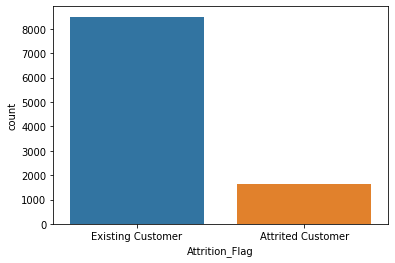

In [5]:
sns.countplot(dataset.Attrition_Flag)
dataset['Attrition_Flag'].value_counts()

The dataset contains several numerical and categorical columns providing various information on the customer behavior

#### Customer Age

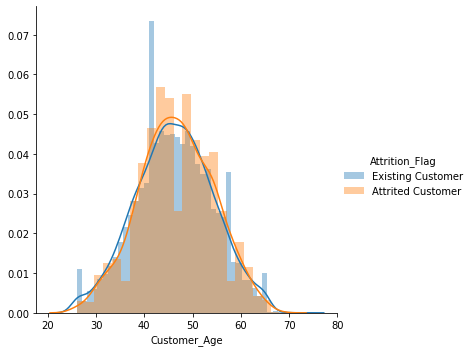

In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.FacetGrid(dataset,hue='Attrition_Flag',size=5).map(sns.distplot,'Customer_Age').add_legend()


Customer age in our dataset follows a fairly normal distribution.Customer's age doesn't play a part in churning accodring to the plot above.More than 70% of the customers are in age range between 36-56y, so we may pay attention to the behavior of the feature in this particular range so we can find some pattern for  better prediction

#### Gender

F    5358
M    4769
Name: Gender, dtype: int64

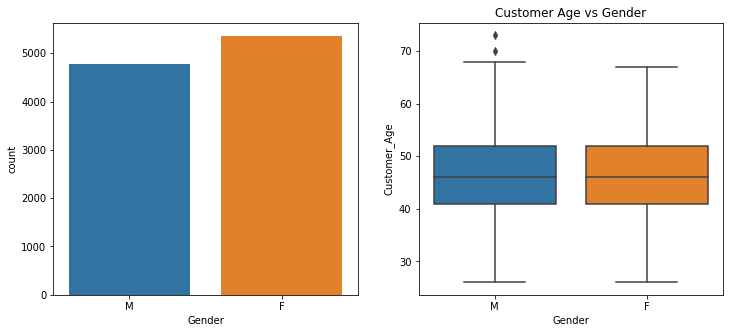

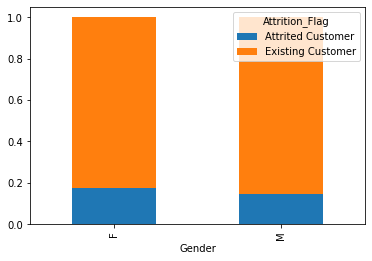

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(dataset['Gender'])

plt.subplot(122)
plt.title("Customer Age vs Gender")
sns.boxplot(x = "Gender", y = "Customer_Age", data=dataset)

gender= pd.crosstab(dataset['Gender'], dataset['Attrition_Flag'])
gender.div(gender.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset['Gender'].value_counts()

The Bank has more female cusomers than male generally, but the percentage of difference is not that significant.The proportion of female customers churning is greater than that of male customers but in proportion with the total number of cusomers by gender.

#### Education Level

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Attrition_Flag,,,,,,,
Attrited Customer,154,95,487,306,92,237,256
Existing Customer,859,356,2641,1707,424,1250,1263


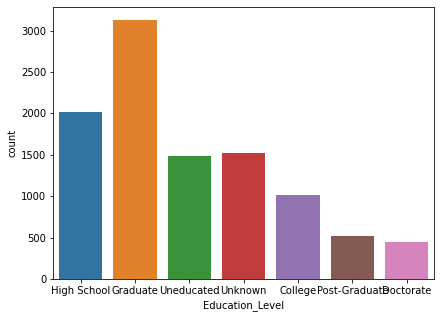

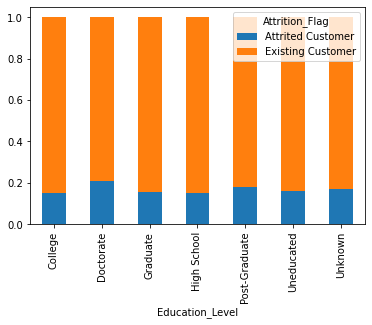

In [8]:
education = pd.crosstab(dataset['Education_Level'], dataset['Attrition_Flag'])
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(dataset['Education_Level'])

education.div(education.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
dataset.groupby('Attrition_Flag')["Education_Level"].value_counts().unstack()


Majority of clients have level of eduction high school and graduate, but also there is significent number of clients with unknown education status.The attrition class has a higher proportion of doctorate and  post-graduate education level compared to the existing customer class.

#### Marital Status

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

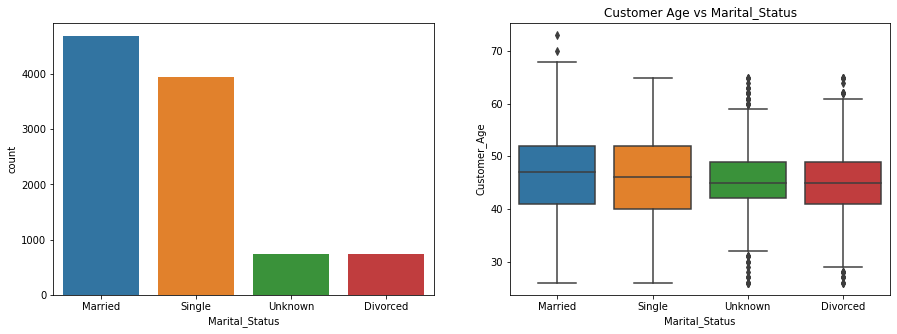

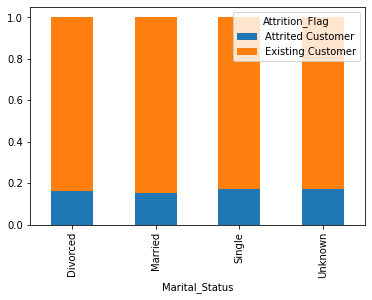

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dataset['Marital_Status'])

plt.subplot(122)
plt.title("Customer Age vs Marital_Status")
sns.boxplot(x = "Marital_Status", y = "Customer_Age", data=dataset)

marital= pd.crosstab(dataset['Marital_Status'], dataset['Attrition_Flag'])
marital.div(marital.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset['Marital_Status'].value_counts()


Almost half of the bank customers are married,  almost the entire other half are single customers. There are 749 customers whose marital status is given as Unknown which age distribution is between 32 and 58 years expect some outliers so we can consider for making this value  married or singele status or keep it as it is.Churning is not depending on marital status

#### Income Category


 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


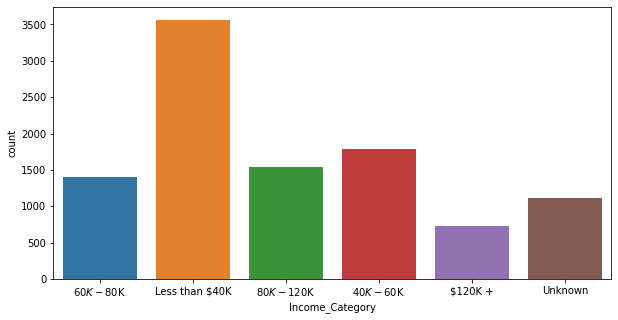

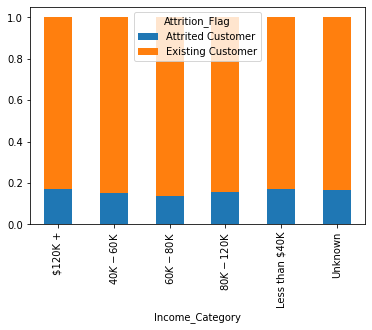

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['Income_Category'])

income= pd.crosstab(dataset['Income_Category'], dataset['Attrition_Flag'])
income.div(income.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

print('\n', dataset['Income_Category'].value_counts())

We can see that the most of  Banks’s clients are with lower income ,approximately same proportion of churning customers for all income categories.There are also customers with unknown income , who should be taken in consider

#### Card Category

Card_Category,Blue,Gold,Platinum,Silver
Attrition_Flag,,,,
Attrited Customer,1519,21,5,82
Existing Customer,7917,95,15,473


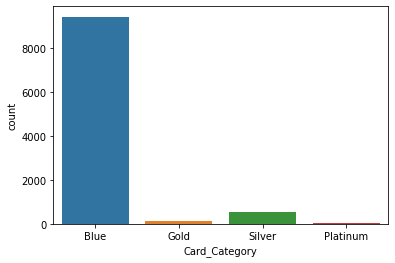

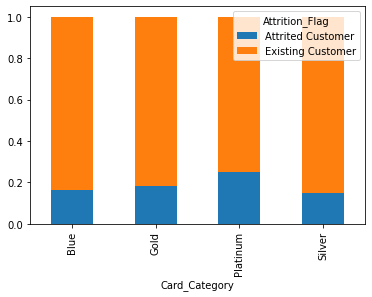

In [11]:
sns.countplot(dataset['Card_Category'])

cards= pd.crosstab(dataset['Card_Category'], dataset['Attrition_Flag'])
cards.div(cards.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
dataset.groupby('Attrition_Flag')["Card_Category"].value_counts().unstack()



Blue cardholders are maximum, but  Platinum cardholders are more likely to churn

#### Dependent count-close family size

Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,,
0,135,769
1,269,1569
2,417,2238
3,482,2250
4,260,1314
5,64,360


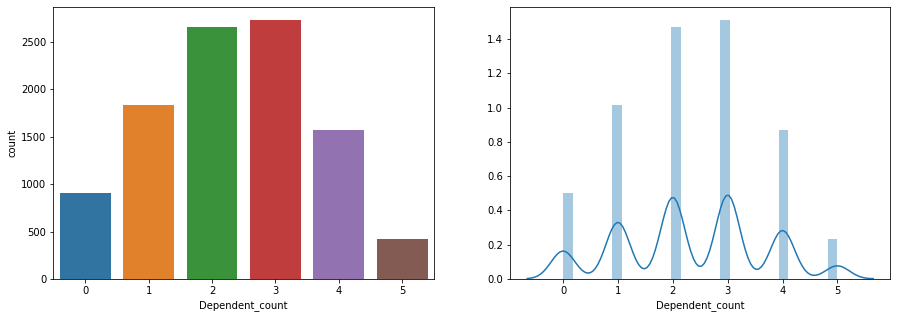

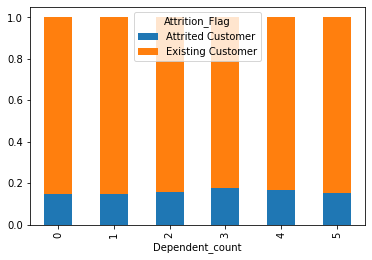

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(dataset['Dependent_count'])
plt.subplot(122)
sns.distplot(dataset['Dependent_count'], label='Dependent_count')

data= pd.crosstab(dataset['Dependent_count'], dataset['Attrition_Flag'])
data.div(data.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

data 

The distribution of Dependent counts is fairly normally distributed, most of the clients have 2-3 dependents.Аpproximately same proportion of churning customers, not depending on number of dependents 

#### Months Inactive 

Months_Inactive_12_mon,0,1,2,3,4,5,6
Attrition_Flag,,,,,,,
Attrited Customer,15,100,505,826,130,32,19
Existing Customer,14,2133,2777,3020,305,146,105


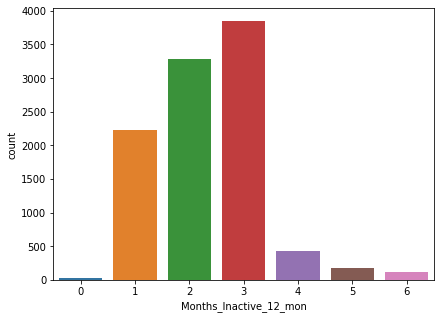

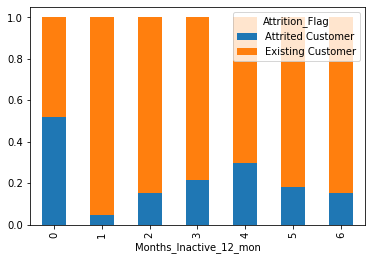

In [13]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dataset['Months_Inactive_12_mon'])

inactive= pd.crosstab(dataset['Months_Inactive_12_mon'], dataset['Attrition_Flag'])
inactive.div(inactive.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset.groupby('Attrition_Flag')["Months_Inactive_12_mon"].value_counts().unstack()


Most od the clients were inactive 1-3 months.Majority of the clients who abandoned the Bank were inactive approximately 4 months or less than a month. Overall customers with 3 or more inactive months in the past 12 months have a higher proportion of attrition.

#### Total_Relationship_Count-Total no. of products held by the customer

Total_Relationship_Count,1,2,3,4,5,6
Attrition_Flag,,,,,,
Attrited Customer,233,346,400,225,227,196
Existing Customer,677,897,1905,1687,1664,1670


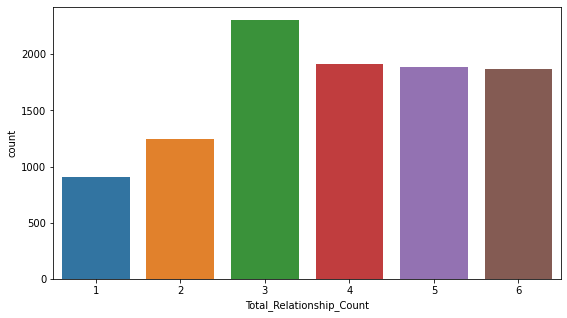

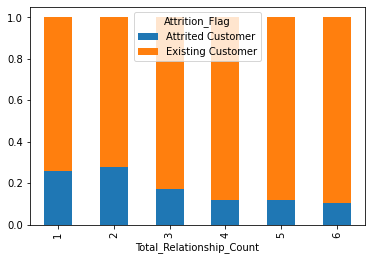

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.countplot(dataset['Total_Relationship_Count'])

products=pd.crosstab(dataset['Total_Relationship_Count'], dataset['Attrition_Flag'])
products.div(products.sum(axis=1), axis=0).plot(kind="bar", stacked=True)              
products 

dataset.groupby('Attrition_Flag')["Total_Relationship_Count"].value_counts().unstack()


Majority of the clients hold 3 or more products.Customers who hold more products from the same bank stay with the bank while the customers holding fewer products churn

#### Contacts_Count_12_mon- No. of Contacts in the last 12 months

Attrition_Flag,Attrited Customer,Existing Customer
Contacts_Count_12_mon,,
0,7,392
1,108,1391
2,403,2824
3,681,2699
4,315,1077
5,59,117
6,54,0


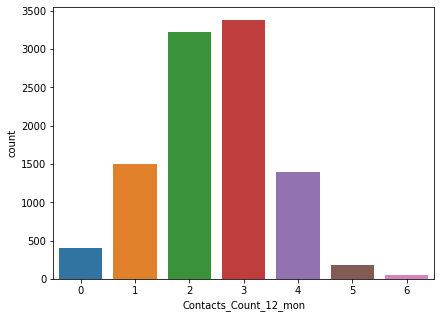

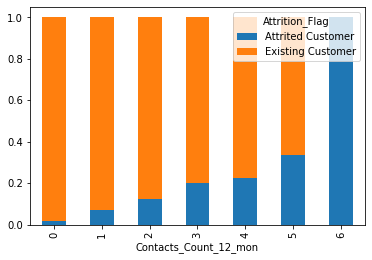

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dataset['Contacts_Count_12_mon'])

contacts=pd.crosstab(dataset['Contacts_Count_12_mon'], dataset['Attrition_Flag'])
contacts.div(contacts.sum(axis=1), axis=0).plot(kind="bar", stacked=True)              
contacts 


Most od the clients were contacted 2 or 3 times.Customers with 3 or more contacts count in the past 12 months have a higher proportion of attrition. The bank has contacted the churning customers more frequently than the no churn cusotmers

#### Total Transaction Count

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

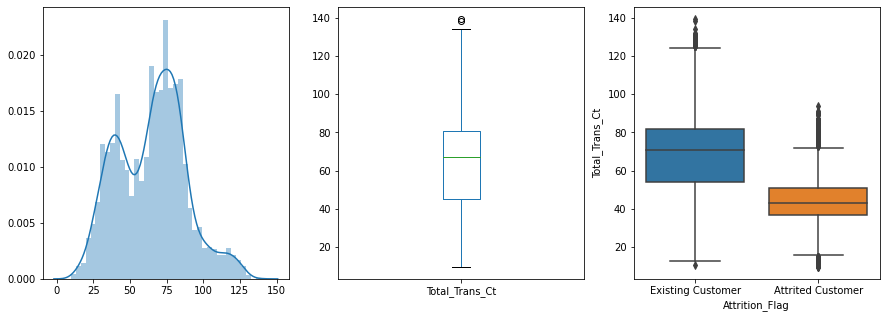

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(131)
Months_on_book = [dataset['Total_Trans_Ct'].values]
sns.distplot(Months_on_book)

plt.subplot(132)
dataset['Total_Trans_Ct'].plot(kind='box', label="Total_Trans_Ct")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Ct", data=dataset)

We have some underlying groups in our data.The attrition class has a lower total transaction count compared to the existing customers class

#### Total Transaction Amount

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

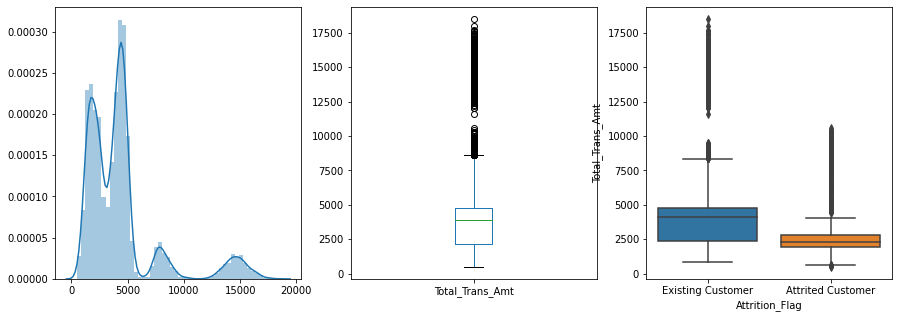

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Trans_Amt = [dataset['Total_Trans_Amt'].values]
sns.distplot(Total_Trans_Amt)

plt.subplot(132)
dataset['Total_Trans_Amt'].plot(kind='box', label="Total_Trans_Amt")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Amt", data=dataset)


The attrition class has a lower Total Transaction Amount compared to the existing customers class

#### Total_Ct_Chng_Q4_Q1-(Change in Transaction Count (Q4 over Q1)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

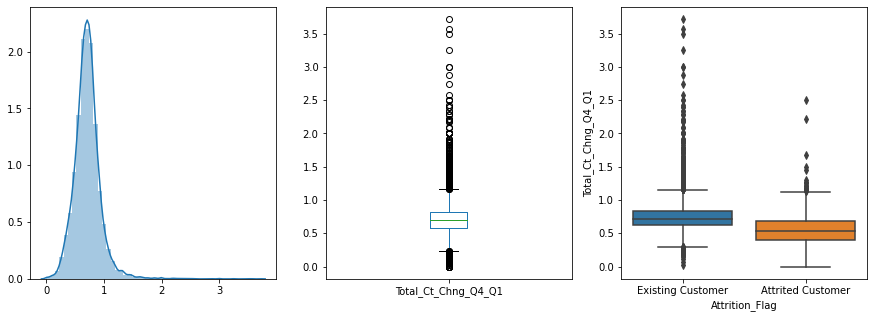

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Ct_Chng_Q4_Q1 = [dataset['Total_Ct_Chng_Q4_Q1'].values]
sns.distplot(Total_Ct_Chng_Q4_Q1)

plt.subplot(132)
dataset['Total_Ct_Chng_Q4_Q1'].plot(kind='box', label="Total_Ct_Chng_Q4_Q1")
plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Ct_Chng_Q4_Q1", data=dataset)

#### Total_Amt_Chng_Q4_Q1(Change in Transaction Amount (Q4 over Q1)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

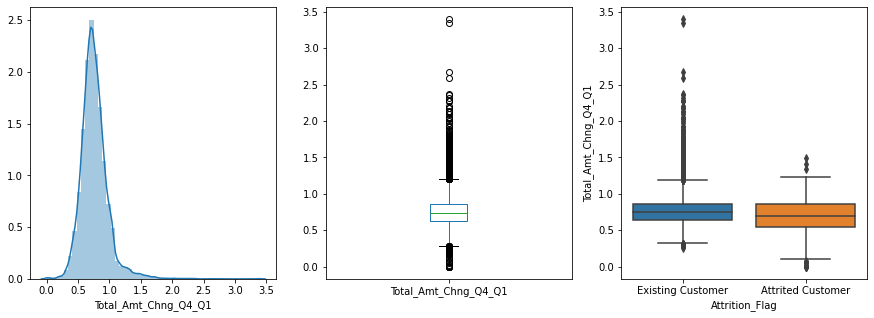

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Total_Amt_Chng_Q4_Q1'], label='Total_Amt_Chng_Q4_Q1')

plt.subplot(132)
dataset['Total_Amt_Chng_Q4_Q1'].plot(kind='box', label="Total_Amt_Chng_Q4_Q1")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Amt_Chng_Q4_Q1", data=dataset)


#### Total_Revolving_Bal-Total Revolving Balance on the Credit Card

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

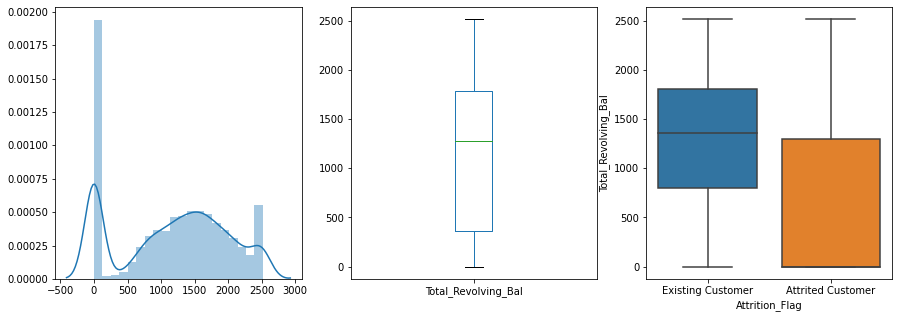

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Revolving_Bal = [dataset['Total_Revolving_Bal'].values]
sns.distplot(Total_Revolving_Bal)

plt.subplot(132)
dataset['Total_Revolving_Bal'].plot(kind='box', label="Total_Revolving_Bal")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Revolving_Bal", data=dataset)


The attrition class has a lower total revolving balance compared to the existing customers class

#### Avg_Utilization_Ratio

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

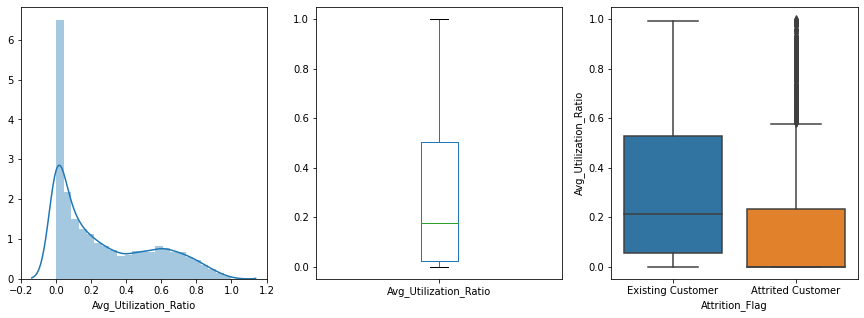

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Avg_Utilization_Ratio'], label='Avg_Utilization_Ratio')

plt.subplot(132)
dataset['Avg_Utilization_Ratio'].plot(kind='box', label="Avg_Utilization_Ratio")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Avg_Utilization_Ratio", data=dataset)


Credit utilization ratio is how much you owe on all your revolving accounts, such as credit cards, compared with your total available credit — expressed as a percentage. It's important because it's one of the biggest factors in your credit score.Experts suggest using no more than 30% of your limits, and less is better. Charging too much on your cards, especially if you max them out, is associated with being a higher credit risk. Its clear that this feature distribution is lower for Churned customer when compared to the Exisiting customers.
Churning customers  most of them have Avg_Utilization_Ratio under 30%, so mabye over-indebted isn't the reason for leaving

The attrition class has a lower total transaction count, total amount  change,total count change, total revolving balance, average utilization ratio and total transactions amount compared to the existing customers class, as expected.

#### Avg_Open_To_Buy-The difference between the credit limit assigned to a cardholder account and the present balance on the account

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

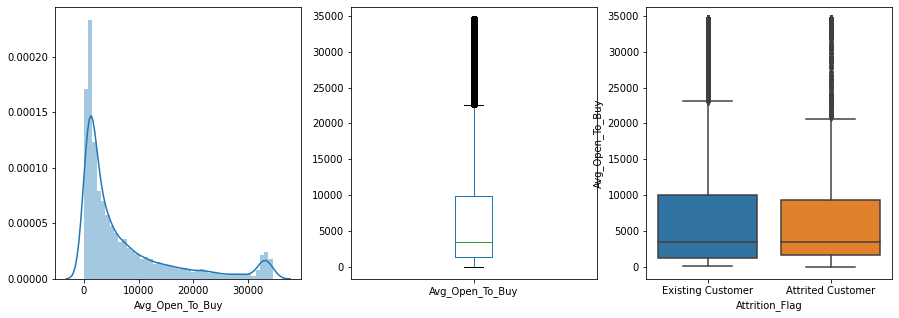

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Avg_Open_To_Buy'], label='Avg_Open_To_Buy')

plt.subplot(132)
dataset['Avg_Open_To_Buy'].plot(kind='box', label="Avg_Open_To_Buy")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Avg_Open_To_Buy", data=dataset)


•	Avg_Open_To_Buy  ,both the Churn and No churn customer's distribution are almost the same for this feature

#### Credit Limit

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

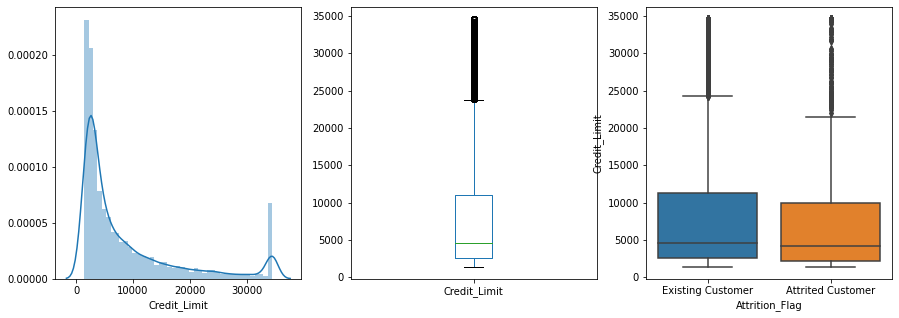

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Credit_Limit'], label='Credit_Limit')

plt.subplot(132)
dataset['Credit_Limit'].plot(kind='box', label="Credit_Limit")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Credit_Limit", data=dataset)


Same data distribution of churning and existing customers,not significent influence of feature Credit limt to the class

Most of the numercial features have skew distribution, so we should take in consider of doing some transformations in order to make data conform to normality 

#### Months_on_book

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_on_book'>

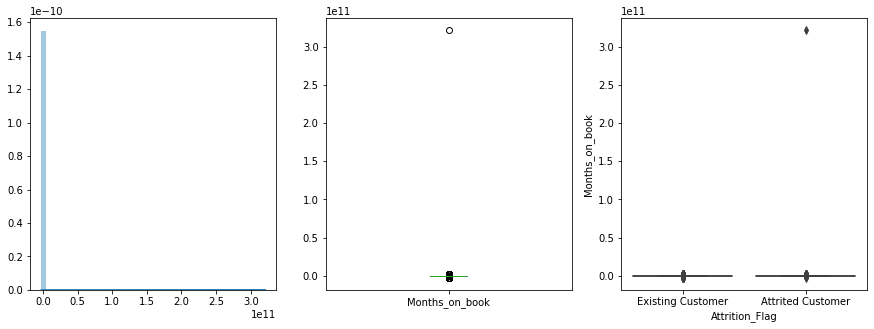

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(131)
Months_on_book = [dataset['Months_on_book'].values]
sns.distplot(Months_on_book)

plt.subplot(132)
dataset['Months_on_book'].plot(kind='box', label="Months_on_book")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Months_on_book", data=dataset)


In [26]:
print(dataset['Months_on_book'].skew())
dataset['Months_on_book'].describe()

100.29059631376872


count    1.012700e+04
mean     3.742297e+07
std      3.193385e+09
min     -2.147484e+09
25%      3.100000e+01
50%      3.600000e+01
75%      4.000000e+01
max      3.210000e+11
Name: Months_on_book, dtype: float64

It is obiviously that 'Months_on_book' feauture has outliers as it is min. value =-2.147484e+09 and max. value =3.210000e+11 so, appropriate outlier treatment must be done.